In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
cur = con.cursor()

# Q1: How are tmdb ratings linked to revenue and profitability? (simplified)

In [39]:
#simplified - only using 1 of the box office money
query1="""select title, popularity, vote_average, vote_count 
production_budget, domestic_gross, worldwide_gross
from tmdb_movies join tn_movie_budgets on title=movie"""
#cur.execute(query,con)
#df=pd.DataFrame(cur.fetchall())
#df.columns = [x[0] for x in cur.description()]
#df
df1 = pd.read_sql_query(query1, con)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2448 non-null   object 
 1   popularity         2448 non-null   float64
 2   vote_average       2448 non-null   float64
 3   production_budget  2448 non-null   int64  
 4   domestic_gross     2448 non-null   object 
 5   worldwide_gross    2448 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 114.9+ KB


In [8]:
df1[df1.columns[3:]] = df1[df1.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df1['profitability'] = df1['worldwide_gross']-df1['production_budget']

In [10]:
df1.sort_values(by=['profitability'],ascending=False)

,title,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,profitability
5,Avatar,26.526,7.4,18676.0,760507625.0,2.776345e+09,2.776327e+09
2240,Avengers: Infinity War,80.773,8.3,13948.0,678815482.0,2.048134e+09,2.048120e+09
1430,Jurassic World,20.709,6.6,14056.0,652270625.0,1.648855e+09,1.648841e+09
1433,Furious 7,20.396,7.3,6538.0,353007020.0,1.518723e+09,1.518716e+09
581,The Avengers,50.289,7.6,19673.0,623279547.0,1.517936e+09,1.517916e+09
...,...,...,...,...,...,...,...
1810,Hush,12.194,6.8,2147.0,0.0,0.000000e+00,-2.147000e+03
1487,Home,12.835,6.8,2372.0,0.0,0.000000e+00,-2.372000e+03
2071,Bright,15.677,6.2,3181.0,0.0,0.000000e+00,-3.181000e+03
2281,Bird Box,26.156,7.0,4777.0,0.0,0.000000e+00,-4.777000e+03


Text(0, 0.5, 'profitability')

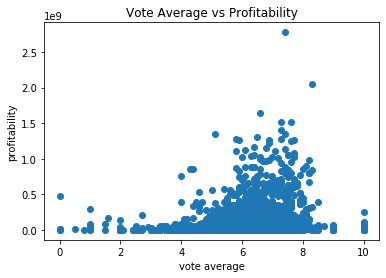

In [15]:
plt.scatter(df1['vote_average'],df1['profitability'])
plt.title('Vote Average vs Profitability')
plt.xlabel('vote average')
plt.ylabel('profitability')

Q6: Are ratings and popularity well correlated?


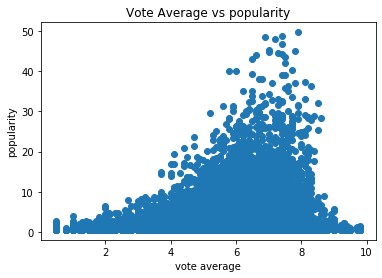

In [10]:
query= """SELECT DISTINCT
    id, popularity, vote_average
FROM
    tmdb_movies
WHERE
    vote_average > 0 AND vote_Average < 10
        AND popularity > 0
        AND popularity < 50
ORDER BY popularity , vote_average"""
df_tmdb_ratings = pd.read_sql_query(query, con)
plt.scatter(df_tmdb_ratings['vote_average'],df_tmdb_ratings['popularity'])
plt.title('Vote Average vs popularity')
plt.xlabel('vote average')
plt.ylabel('popularity')
plt.show()
#some correlation

In [ ]:
# Q6: Are tmdb ratings and rt ratings well correlated?
#no way to tell because no link between rt and imdb other than writer and director name

Q7: Do tmdb ratings indicate success?

In [42]:
df_rev = pd.read_csv('joined_revenue')
df_rev.shape

(7859, 6)

In [43]:
df_rev.head()

,Unnamed: 0,movie_title,production_budget,domestic_gross,worldwide_gross,release_year
0,0,High Fidelity,20000000.0,27277055.0,47881663.0,2000.0
1,1,San suk si gin,15000000.0,0.0,2013340.0,2010.0
2,2,The Betrayed,3500000.0,0.0,0.0,2009.0
3,3,Stardust,70000000.0,38634938.0,137022245.0,2007.0
4,4,Friday the 13th Part 2,1250000.0,21722776.0,21722776.0,1981.0


In [28]:
query3= """SELECT DISTINCT title, popularity, vote_average, year(release_date) as year_release
FROM
    tmdb_movies
WHERE
    vote_average > 0 AND vote_Average < 10
        AND popularity > 0
        AND popularity < 50
ORDER BY popularity , vote_average"""
#remove outliers
df_tmdb_ratings = pd.read_sql_query(query3, con)
#popularity is an algorithm that spits out combo of votes, rate, etc to determine how popular 
#movie is right now - votes are building block

In [24]:
df_tmdb_ratings.head()

,title,popularity,vote_average,year_release
0,Air,0.6,0.5,2014
1,All Ages: The Boston Hardcore Film,0.6,0.5,2012
2,American Marriage,0.6,0.5,2012
3,Beyond Food,0.6,0.5,2017
4,Chihuahua too!,0.6,0.5,2013


In [44]:
df_rev.drop(df_rev[df_rev['movie_title'] == 'Avatar'].index, inplace = True)
#drop avatar because it skews this

In [45]:
df_rev.shape

(7858, 6)

In [46]:
df_tmdb_ratings_rev = df_tmdb_ratings.merge(df_rev,how='inner',left_on=['title','year_release'], right_on=['movie_title','release_year'])

In [61]:
df_tmdb_ratings_top100=df_tmdb_ratings_rev.nlargest(100,['vote_average'])

In [54]:
df_rev_top100=df_tmdb_ratings_rev.nlargest(100,['worldwide_gross'])

Text(0, 0.5, 'WW Gross Rev')

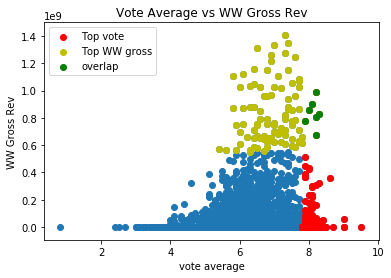

In [69]:
plt.scatter(df_tmdb_ratings_rev['vote_average'],df_tmdb_ratings_rev['worldwide_gross'])
plt.scatter( df_tmdb_ratings_top100['vote_average'],df_tmdb_ratings_top100['worldwide_gross'], c='r',label='Top vote')
plt.scatter(df_rev_top100['vote_average'],df_rev_top100['worldwide_gross'], c='y', label='Top WW gross')
plt.scatter(vote_overlap['vote_average'],vote_overlap['worldwide_gross'],c='g', label = 'overlap')
plt.legend()
plt.title('Vote Average vs WW Gross Rev')
plt.xlabel('vote average')
plt.ylabel('WW Gross Rev')

In [58]:
df_rev_top100.head()

,title,popularity,vote_average,year_release,Unnamed: 0,movie_title,production_budget,domestic_gross,worldwide_gross,release_year
2522,Avengers: Age of Ultron,44.383,7.3,2015,7880,Avengers: Age of Ultron,330600000.0,459000000.0,1.405400e+09,2015.0
2521,Black Panther,44.140,7.4,2018,7889,Black Panther,200000000.0,700100000.0,1.347000e+09,2018.0
2501,Star Wars: The Last Jedi,34.293,7.0,2017,7885,Star Wars: The Last Jedi,NaN,620200000.0,1.332600e+09,2017.0
2503,Jurassic World: Fallen Kingdom,34.958,6.5,2018,7877,Jurassic World: Fallen Kingdom,170000000.0,417700000.0,1.309500e+09,2018.0
2433,Frozen,26.183,7.3,2013,7870,Frozen,150000000.0,400700000.0,1.276400e+09,2013.0


In [67]:
vote_overlap = df_tmdb_ratings_top100.merge(df_rev_top100, how='inner' )
#only 7% overlap between high reveneue and ratings - not great

In [73]:
vote_overlap.shape

(7, 10)

In [62]:
df_tmdb_popularity_top100=df_tmdb_ratings_rev.nlargest(100,['popularity'])

Text(0, 0.5, 'WW Gross Rev')

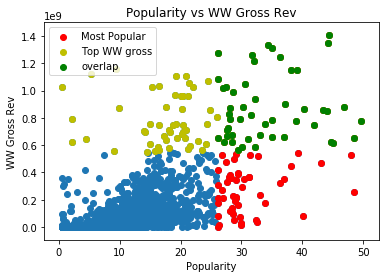

In [71]:
plt.scatter(df_tmdb_ratings_rev['popularity'],df_tmdb_ratings_rev['worldwide_gross'])
plt.scatter(df_tmdb_popularity_top100['popularity'], df_tmdb_popularity_top100['worldwide_gross'], c='r', label='Most Popular')
plt.scatter(df_rev_top100['popularity'],df_rev_top100['worldwide_gross'], c='y', label='Top WW gross')
plt.scatter(popularity_overlap['popularity'], popularity_overlap['worldwide_gross'], c='g', label='overlap')
plt.legend()
plt.title('Popularity vs WW Gross Rev')
plt.xlabel('Popularity')
plt.ylabel('WW Gross Rev')

In [72]:
popularity_overlap = df_tmdb_popularity_top100.merge(df_rev_top100, how='inner' )
# much higher correlation
popularity_overlap.shape

(49, 10)

In [86]:
popularity_overlap_title=list(popularity_overlap['title'])

In [87]:
popularity_overlap_title_cat=['Marvel',
'Harry Potter',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'DC Comics',
'Bohemian Rhapsody',
'Disney Animation',
'Disney Animation',
'Marvel',
'Jurassic Park',
'DC Comics',
'Star Wars',
'Hunger Games',
'Marvel',
'Star Wars',
'Hangover',
'Marvel',
'Disney Animation',
'DC Comics',
'Marvel',
'Pirates of the Caribbean',
'James Bond',
'Ready Plater One',
'Mission Impossible',
'King Kong',
'Disney Animation',
'Marvel',
'Interstellar',
'Pirates of the Caribbean',
'DC Comics',
'Inception',
'Gravity',
'DC Comics',
'Planet of the Apes ',
'Disney Animation',
'Dreamworks',
'Lord of the Rings',
'DC Comics',
'Disney Animation',
'Marvel',]

In [135]:
count=[1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,]

In [136]:
popularity_overlap={'popularity_overlap_title':popularity_overlap_title,'popularity_overlap_title_cat':popularity_overlap_title_cat,'count':count}
popularity_overlap=pd.DataFrame(popularity_overlap)
popularity_overlap.head()

,popularity_overlap_title,popularity_overlap_title_cat,count
0,Guardians of the Galaxy,Marvel,1
1,Fantastic Beasts: The Crimes of Grindelwald,Harry Potter,1
2,Spider-Man: Homecoming,Marvel,1
3,Logan,Marvel,1
4,Ant-Man and the Wasp,Marvel,1


In [139]:
popularity_overlap_count = popularity_overlap.groupby(['popularity_overlap_title_cat']).sum().sort_values(by=['count'], ascending = False)

In [140]:
popularity_overlap_count

,count
popularity_overlap_title_cat,
Marvel,18
Disney Animation,6
DC Comics,6
Star Wars,2
Pirates of the Caribbean,2
Jurassic Park,1
Ready Plater One,1
Planet of the Apes,1
Mission Impossible,1


In [143]:
popularity_overlap_count=popularity_overlap_count.reset_index()

In [144]:
popularity_overlap_count

,popularity_overlap_title_cat,count
0,Marvel,18
1,Disney Animation,6
2,DC Comics,6
3,Star Wars,2
4,Pirates of the Caribbean,2
5,Jurassic Park,1
6,Ready Plater One,1
7,Planet of the Apes,1
8,Mission Impossible,1
9,Lord of the Rings,1


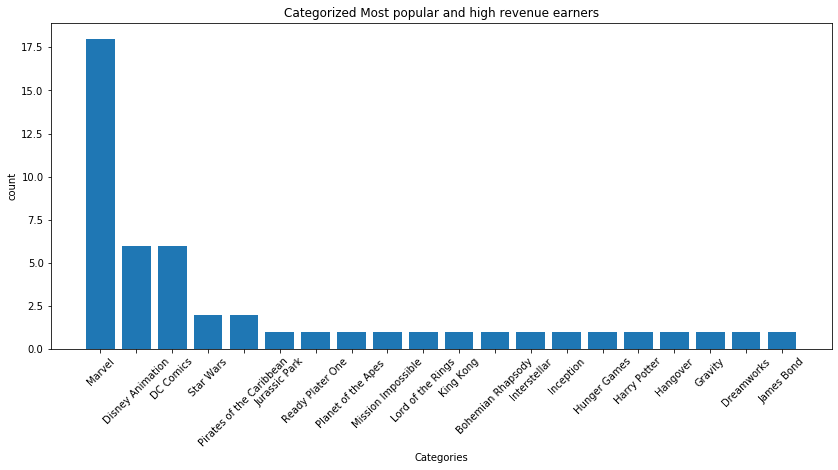

In [146]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.bar(popularity_overlap_count['popularity_overlap_title_cat'],popularity_overlap_count['count'])
ax.set_title('Categorized Most popular and high revenue earners')
ax.set_ylabel('count')
ax.set_xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

Q8: DO RT ratings indicate success - not possible to link to imdb right now 
cant use